### import and read data

In [ ]:
import json
import math
import os

import numpy as np
import pandas as pd
from keras import layers
from tensorflow import keras
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

if physical_devices:
    # Nếu có GPU, in ra thông tin của từng GPU
    for gpu in physical_devices:
        # Lấy thông tin chi tiết của GPU
        gpu_details = tf.config.experimental.get_device_details(gpu)

        # # In ra tên và dung lượng RAM của GPU
        print("GPU Device:", gpu_details["device_name"])
else:
    print("No GPU available, TensorFlow is using CPU.")


GPU Device: NVIDIA GeForce RTX 2070


In [ ]:

# mount google drive
WORK_PATH = 'C:/Users/ADMIN/Contacts/KLTN/data'
SAVE_PATH = 'C:/Users/ADMIN/Contacts/KLTN/model'

In [ ]:

# batch_size = 16
batch_size = 64
IMG_HEIGHT = int(224)
IMG_WIDTH = int(224)

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_balan'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 1476 images belonging to 5 classes.


In [ ]:
# columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
# df = pd.DataFrame(columns=columns)
# df.to_csv("history_choice.csv", index=False)
# pd.read_csv('history_choice.csv')

### VGG19

In [ ]:
def build_model_vgg19():
    inputs = keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,3), name='inputs')
    model = keras.applications.VGG19(include_top= False, weights= 'imagenet', input_tensor= inputs)
    x = model.output
    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(4096,activation = 'relu',name = 'dense_1')(x)
    x = keras.layers.Dense(4096,activation = 'relu',name = 'dense_2')(x)
    outputs = keras.layers.Dense(5,activation= 'softmax', name='dense_out')(x)
    model = keras.Model(inputs=inputs, outputs = outputs,name="model_use_VGG19")
    l = len(model.layers)
    for i, layer in enumerate(model.layers):
        if i <= 0.5*l: layer.trainable = False
    return model

In [ ]:
model = build_model_vgg19()
# Biên dịch
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')

callbacks_1 = keras.callbacks.EarlyStopping(monitor="accuracy",patience = 10,
                                          verbose=1,min_delta = 0.00001,
                                          restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v1.h5'),
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_1,callbacks_2]



In [ ]:
#Training model
history = model.fit(i_train,epochs = 50,callbacks = callbacks)

Epoch 1/50
24/24 [==============================] - 26s 626ms/step - loss: 2.0316 - accuracy: 0.1944
Epoch 2/50
24/24 [==============================] - 8s 317ms/step - loss: 1.6095 - accuracy: 0.1870
Epoch 3/50
24/24 [==============================] - 15s 627ms/step - loss: 1.6095 - accuracy: 0.2033
Epoch 4/50
24/24 [==============================] - 8s 315ms/step - loss: 1.6095 - accuracy: 0.1870
Epoch 5/50
24/24 [==============================] - 8s 314ms/step - loss: 1.6095 - accuracy: 0.2033
Epoch 6/50
24/24 [==============================] - 8s 315ms/step - loss: 1.6094 - accuracy: 0.2033
Epoch 7/50
24/24 [==============================] - 8s 315ms/step - loss: 1.6095 - accuracy: 0.2033
Epoch 8/50
24/24 [==============================] - 8s 315ms/step - loss: 1.6095 - accuracy: 0.2033
Epoch 9/50
24/24 [==============================] - 8s 315ms/step - loss: 1.6095 - accuracy: 0.2033
Epoch 10/50
24/24 [==============================] - 8s 315ms/step - loss: 1.6095 - accuracy: 0.20

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

### VGG16

In [ ]:
def build_model_vgg16():
    inputs = keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,3), name='inputs')
    model = keras.applications.VGG16(include_top= False, weights= 'imagenet', input_tensor= inputs)
    x = model.output
    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(4096,activation = 'relu',name = 'dense_1')(x)
    x = keras.layers.Dense(4096,activation = 'relu',name = 'dense_2')(x)
    outputs = keras.layers.Dense(5,activation= 'softmax', name='dense_out')(x)
    model = keras.Model(inputs=inputs, outputs = outputs,name="model_use_VGG16")
    l = len(model.layers)
    for i, layer in enumerate(model.layers):
        if i <= 0.5*l: layer.trainable = False
    return model

In [ ]:
model = build_model_vgg16()
# Biên dịch
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')

callbacks_1 = keras.callbacks.EarlyStopping(
    monitor="accuracy",patience = 10,
    verbose=1,min_delta = 0.00001,
    restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG16_v1.h5'),
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_1,callbacks_2]


In [ ]:
#Training model
history = model.fit(i_train,epochs = 30,callbacks = callbacks)

Epoch 1/30
24/24 [==============================] - 15s 597ms/step - loss: 1.9358 - accuracy: 0.1944
Epoch 2/30
24/24 [==============================] - 9s 357ms/step - loss: 1.6096 - accuracy: 0.1789
Epoch 3/30
24/24 [==============================] - 13s 526ms/step - loss: 1.6095 - accuracy: 0.1992
Epoch 4/30
24/24 [==============================] - 8s 344ms/step - loss: 1.6095 - accuracy: 0.1992
Epoch 5/30
24/24 [==============================] - 8s 357ms/step - loss: 1.6095 - accuracy: 0.1802
Epoch 6/30
24/24 [==============================] - 13s 532ms/step - loss: 1.6095 - accuracy: 0.2033
Epoch 7/30
24/24 [==============================] - 9s 343ms/step - loss: 1.6095 - accuracy: 0.2012
Epoch 8/30
24/24 [==============================] - 8s 343ms/step - loss: 1.6095 - accuracy: 0.1992
Epoch 9/30
24/24 [==============================] - 8s 348ms/step - loss: 1.6095 - accuracy: 0.2019
Epoch 10/30
24/24 [==============================] - 8s 343ms/step - loss: 1.6095 - accuracy: 0.1

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

### Resnet50

In [ ]:
def build_model_resnet50():
    inputs = keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,3), name='inputs')
    model = keras.applications.resnet50.ResNet50(include_top= False, weights= 'imagenet', input_tensor= inputs)
    x = model.output
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(5,activation= 'softmax')(x)
    model = keras.Model(inputs=inputs, outputs = outputs,name="model_use_ResNet50")
    # Đóng băng 1 phần mô hình
    l = len(model.layers)
    for i, layer in enumerate(model.layers):
        if i <= 0.7*l: layer.trainable = False
    return model



In [ ]:
model = build_model_resnet50()
# Biên dịch
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')

# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_resnet50_v1.h5'),
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]
#Training model



In [ ]:
history = model.fit(i_train,epochs = 20,callbacks = callbacks)


Epoch 1/20
24/24 [==============================] - 11s 320ms/step - loss: 1.7052 - accuracy: 0.2432
Epoch 2/20
24/24 [==============================] - 8s 322ms/step - loss: 1.6189 - accuracy: 0.2920
Epoch 3/20
24/24 [==============================] - 8s 329ms/step - loss: 1.5665 - accuracy: 0.3130
Epoch 4/20
24/24 [==============================] - 6s 229ms/step - loss: 1.5256 - accuracy: 0.3096
Epoch 5/20
24/24 [==============================] - 8s 327ms/step - loss: 1.5079 - accuracy: 0.3381
Epoch 6/20
24/24 [==============================] - 8s 330ms/step - loss: 1.4792 - accuracy: 0.3631
Epoch 7/20
24/24 [==============================] - 6s 230ms/step - loss: 1.4718 - accuracy: 0.3449
Epoch 8/20
24/24 [==============================] - 8s 320ms/step - loss: 1.4335 - accuracy: 0.3706
Epoch 9/20
24/24 [==============================] - 6s 229ms/step - loss: 1.4189 - accuracy: 0.3672
Epoch 10/20
24/24 [==============================] - 8s 332ms/step - loss: 1.4078 - accuracy: 0.372

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

In [ ]:
history = model.fit(i_train,epochs = 50,callbacks = callbacks)


Epoch 1/50
24/24 [==============================] - 6s 230ms/step - loss: 1.2570 - accuracy: 0.4566
Epoch 2/50
24/24 [==============================] - 6s 229ms/step - loss: 1.2789 - accuracy: 0.4343
Epoch 3/50
24/24 [==============================] - 8s 327ms/step - loss: 1.1802 - accuracy: 0.4932
Epoch 4/50
24/24 [==============================] - 6s 229ms/step - loss: 1.3780 - accuracy: 0.4092
Epoch 5/50
24/24 [==============================] - 6s 230ms/step - loss: 1.3098 - accuracy: 0.4180
Epoch 6/50
24/24 [==============================] - 6s 229ms/step - loss: 1.2221 - accuracy: 0.4770
Epoch 7/50
24/24 [==============================] - 6s 229ms/step - loss: 1.2251 - accuracy: 0.4736
Epoch 8/50
24/24 [==============================] - 6s 239ms/step - loss: 1.1917 - accuracy: 0.4878
Epoch 9/50
24/24 [==============================] - 8s 324ms/step - loss: 1.1484 - accuracy: 0.5034
Epoch 10/50
24/24 [==============================] - 8s 317ms/step - loss: 1.0576 - accuracy: 0.5528

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+21
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

In [ ]:
history = model.fit(i_train,epochs = 50,callbacks = callbacks)


Epoch 1/50
24/24 [==============================] - 6s 232ms/step - loss: 0.3241 - accuracy: 0.8909
Epoch 2/50
24/24 [==============================] - 8s 327ms/step - loss: 0.2145 - accuracy: 0.9268
Epoch 3/50
24/24 [==============================] - 6s 229ms/step - loss: 0.4336 - accuracy: 0.8449
Epoch 4/50
24/24 [==============================] - 6s 228ms/step - loss: 0.4082 - accuracy: 0.8598
Epoch 5/50
24/24 [==============================] - 6s 233ms/step - loss: 0.2420 - accuracy: 0.9248
Epoch 6/50
24/24 [==============================] - 6s 229ms/step - loss: 0.4333 - accuracy: 0.8564
Epoch 7/50
24/24 [==============================] - 6s 229ms/step - loss: 0.5620 - accuracy: 0.7967
Epoch 8/50
24/24 [==============================] - 6s 229ms/step - loss: 0.3292 - accuracy: 0.8848
Epoch 9/50
24/24 [==============================] - 6s 228ms/step - loss: 0.4262 - accuracy: 0.8401
Epoch 10/50
24/24 [==============================] - 8s 317ms/step - loss: 0.2164 - accuracy: 0.9302

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+71
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

### Resnet101

In [ ]:
def build_model_resnet101():
    inputs = keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,3), name='inputs')
    model = tf.keras.applications.ResNet101(include_top= False, weights= 'imagenet', input_tensor= inputs)
    x = model.output
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Dropout(0.7)(x)
    outputs = keras.layers.Dense(5,activation= 'softmax')(x)
    model = keras.Model(inputs=inputs, outputs = outputs,name="model_use_ResNet101")
    # Đóng băng 1 phần mô hình
    l = len(model.layers)
    for i, layer in enumerate(model.layers):
        if i <= 0.8*l: layer.trainable = False
    return model


In [ ]:
model = build_model_resnet101()
# Biên dịch
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')

# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_Resnet101_v1.h5'),
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]
#Training model



In [ ]:
history = model.fit(i_train,epochs = 70,callbacks = callbacks)


Epoch 1/70
24/24 [==============================] - 21s 600ms/step - loss: 1.8925 - accuracy: 0.2154
Epoch 2/70
24/24 [==============================] - 14s 560ms/step - loss: 1.6822 - accuracy: 0.2425
Epoch 3/70
24/24 [==============================] - 14s 581ms/step - loss: 1.6230 - accuracy: 0.2595
Epoch 4/70
24/24 [==============================] - 14s 596ms/step - loss: 1.5703 - accuracy: 0.2988
Epoch 5/70
24/24 [==============================] - 9s 355ms/step - loss: 1.5443 - accuracy: 0.2900
Epoch 6/70
24/24 [==============================] - 14s 591ms/step - loss: 1.4924 - accuracy: 0.3171
Epoch 7/70
24/24 [==============================] - 14s 569ms/step - loss: 1.4935 - accuracy: 0.3266
Epoch 8/70
24/24 [==============================] - 15s 623ms/step - loss: 1.4491 - accuracy: 0.3516
Epoch 9/70
24/24 [==============================] - 13s 555ms/step - loss: 1.4385 - accuracy: 0.3713
Epoch 10/70
24/24 [==============================] - 14s 582ms/step - loss: 1.4273 - accurac

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

In [ ]:
history = model.fit(i_train,epochs = 10,callbacks = callbacks)


Epoch 1/10
24/24 [==============================] - 9s 348ms/step - loss: 0.0671 - accuracy: 0.9837
Epoch 2/10
24/24 [==============================] - 14s 578ms/step - loss: 0.0268 - accuracy: 0.9973
Epoch 3/10
24/24 [==============================] - 9s 350ms/step - loss: 0.0383 - accuracy: 0.9925
Epoch 4/10
24/24 [==============================] - 9s 356ms/step - loss: 0.0618 - accuracy: 0.9851
Epoch 5/10
24/24 [==============================] - 9s 353ms/step - loss: 0.0266 - accuracy: 0.9946
Epoch 6/10
24/24 [==============================] - 9s 352ms/step - loss: 0.0505 - accuracy: 0.9858
Epoch 7/10
24/24 [==============================] - 9s 355ms/step - loss: 0.1791 - accuracy: 0.9444
Epoch 8/10
24/24 [==============================] - 9s 362ms/step - loss: 0.1837 - accuracy: 0.9350
Epoch 9/10
24/24 [==============================] - 9s 374ms/step - loss: 0.2673 - accuracy: 0.9207
Epoch 10/10
24/24 [==============================] - 9s 367ms/step - loss: 0.0819 - accuracy: 0.976

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+71
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

In [ ]:
pd.read_csv('history_choice.csv').head()

,model_name,epoch,loss,accuracy,val_loss,val_accuracy
0,model_use_VGG19,1,2.031598,0.194444,NaN,NaN
1,model_use_VGG19,2,1.609531,0.186992,NaN,NaN
2,model_use_VGG19,3,1.609490,0.203252,NaN,NaN
3,model_use_VGG19,4,1.609509,0.186992,NaN,NaN
4,model_use_VGG19,5,1.609477,0.203252,NaN,NaN


### VGG19_v2

In [ ]:
def vgg19_return():
    inputs = keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,3), name='inputs')
    model = keras.applications.VGG19(include_top= False, weights= 'imagenet', input_tensor= inputs)
    x = model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation='relu', name='dense_6')(x)
    x = keras.layers.Dense(128, activation='relu', name='dense_7')(x)
    x = keras.layers.Dense(64, activation='relu', name='dense_8')(x)
    x = keras.layers.Dense(32, activation='relu', name='dense_9')(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(5,activation= 'softmax', name='dense_out')(x)
    model = keras.Model(inputs=inputs, outputs = outputs,name="model_use_VGG19_addDense256-128-64-32")
    l = len(model.layers)
    for i, layer in enumerate(model.layers):
        if i <= 0.5*l: layer.trainable = False
    model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')
    return model

In [ ]:
"Flatten, Dense 256-128-64-32, Dropout(0.5)"

'Flatten, Dense 256-128-64-32, Dropout(0.5)'

#### train with data banlace

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_balan'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 1476 images belonging to 5 classes.


In [ ]:
model = vgg19_return()
callbacks_1 = keras.callbacks.EarlyStopping(monitor="accuracy",patience = 10,
                                          verbose=1,min_delta = 0.00001,
                                          restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v1_2.h5'),
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]



In [ ]:
history = model.fit(i_train,epochs = 130,callbacks = callbacks)


Epoch 1/130
24/24 [==============================] - 22s 378ms/step - loss: 1.6215 - accuracy: 0.2039
Epoch 2/130
24/24 [==============================] - 7s 310ms/step - loss: 1.5864 - accuracy: 0.2514
Epoch 3/130
24/24 [==============================] - 7s 310ms/step - loss: 1.5441 - accuracy: 0.2846
Epoch 4/130
24/24 [==============================] - 8s 312ms/step - loss: 1.5119 - accuracy: 0.3042
Epoch 5/130
24/24 [==============================] - 8s 314ms/step - loss: 1.4702 - accuracy: 0.3178
Epoch 6/130
24/24 [==============================] - 7s 282ms/step - loss: 1.4744 - accuracy: 0.3178
Epoch 7/130
24/24 [==============================] - 8s 321ms/step - loss: 1.4445 - accuracy: 0.3496
Epoch 8/130
24/24 [==============================] - 8s 315ms/step - loss: 1.4142 - accuracy: 0.3516
Epoch 9/130
24/24 [==============================] - 7s 307ms/step - loss: 1.3842 - accuracy: 0.3760
Epoch 10/130
24/24 [==============================] - 7s 276ms/step - loss: 1.3855 - accur

In [ ]:
columns = ["model_name", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['epoch'] = history_df.index+1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_choice.csv', index=False,mode='a',header = False)

In [ ]:
# # luư lịch sử chạy các model
# columns = ["model_name","layer","fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
# df = pd.DataFrame(columns=columns)
# df.to_csv("history_fit.csv", index=False)
# pd.read_csv('history_fit.csv')

#### 1

In [ ]:
No_DR = 17295
Mild =3581
Moderate = 1641
Severe = 605
Proliferative_DR = 470
total=No_DR + Mild + Proliferative_DR + Severe + Moderate

weight_for_0 = (1 / Mild) * (total / 5.0)
weight_for_1 = (1 / Moderate) * (total / 5.0)
weight_for_2 = (1 / No_DR) * (total / 5.0)
weight_for_3 = (1 / Proliferative_DR) * (total / 5.0)
weight_for_4 = (1 / Severe) * (total / 5.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}
class_weight

{0: 1.3176207763194636,
 1: 2.8753199268738574,
 2: 0.2728187337380746,
 3: 10.039148936170212,
 4: 7.799008264462809}

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_1'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_1'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5617 images belonging to 5 classes.


In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v1_2.h5')) #weight with data banlace


In [ ]:
# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_21.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)


Epoch 1/100
352/352 [==============================] - 284s 769ms/step - loss: 1.4122 - accuracy: 0.3547 - val_loss: 1.2604 - val_accuracy: 0.3926
Epoch 2/100
352/352 [==============================] - 127s 360ms/step - loss: 1.3159 - accuracy: 0.3665 - val_loss: 1.1603 - val_accuracy: 0.4533
Epoch 3/100
352/352 [==============================] - 126s 357ms/step - loss: 1.2791 - accuracy: 0.3567 - val_loss: 1.4811 - val_accuracy: 0.2825
Epoch 4/100
352/352 [==============================] - 125s 355ms/step - loss: 1.2457 - accuracy: 0.3710 - val_loss: 1.3684 - val_accuracy: 0.3011
Epoch 5/100
352/352 [==============================] - 125s 355ms/step - loss: 1.2317 - accuracy: 0.3699 - val_loss: 1.3332 - val_accuracy: 0.4175
Epoch 6/100
352/352 [==============================] - 125s 354ms/step - loss: 1.1907 - accuracy: 0.3747 - val_loss: 1.1222 - val_accuracy: 0.5163
Epoch 7/100
352/352 [==============================] - 124s 352ms/step - loss: 1.1602 - accuracy: 0.3633 - val_loss: 1

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 50,callbacks = callbacks,class_weight=class_weight)


Epoch 1/50
458/458 [==============================] - 163s 356ms/step - loss: 0.9319 - accuracy: 0.5998 - val_loss: 1.0313 - val_accuracy: 0.5695
Epoch 2/50
458/458 [==============================] - 121s 264ms/step - loss: 0.5937 - accuracy: 0.7206 - val_loss: 0.6968 - val_accuracy: 0.7305
Epoch 3/50
458/458 [==============================] - 121s 265ms/step - loss: 0.3862 - accuracy: 0.8029 - val_loss: 0.5185 - val_accuracy: 0.8129
Epoch 4/50
458/458 [==============================] - 121s 265ms/step - loss: 0.2411 - accuracy: 0.8751 - val_loss: 0.4872 - val_accuracy: 0.8270
Epoch 5/50
458/458 [==============================] - 121s 265ms/step - loss: 0.1524 - accuracy: 0.9224 - val_loss: 0.2438 - val_accuracy: 0.9249
Epoch 6/50
458/458 [==============================] - 121s 265ms/step - loss: 0.1084 - accuracy: 0.9418 - val_loss: 0.1256 - val_accuracy: 0.9637
Epoch 7/50
458/458 [==============================] - 121s 263ms/step - loss: 0.0797 - accuracy: 0.9583 - val_loss: 0.1718 -

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+101
history_df['fold'] = 1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_21.h5')) #weight with data banlace


In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("val:")
model.evaluate(i_val)
print("test:")
model.evaluate(i_test)

Found 7022 images belonging to 5 classes.
val:
176/176 [==============================] - 32s 179ms/step - loss: 3.2858e-04 - accuracy: 1.0000
test:
220/220 [==============================] - 21s 96ms/step - loss: 2.1973 - accuracy: 0.8152


[2.197328567504883, 0.8151524066925049]

#### 2

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_2'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_2'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22468 images belonging to 5 classes.
Found 5618 images belonging to 5 classes.


In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v1_2.h5')) #weight with data banlace


In [ ]:
# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_22.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)


Epoch 1/100
352/352 [==============================] - 485s 1s/step - loss: 1.2776 - accuracy: 0.3848 - val_loss: 1.0133 - val_accuracy: 0.4975
Epoch 2/100
352/352 [==============================] - 114s 324ms/step - loss: 1.0560 - accuracy: 0.4097 - val_loss: 1.0934 - val_accuracy: 0.4916
Epoch 3/100
352/352 [==============================] - 114s 324ms/step - loss: 1.0007 - accuracy: 0.4404 - val_loss: 1.0884 - val_accuracy: 0.4938
Epoch 4/100
352/352 [==============================] - 114s 324ms/step - loss: 0.9677 - accuracy: 0.4695 - val_loss: 1.2184 - val_accuracy: 0.3350
Epoch 5/100
352/352 [==============================] - 115s 327ms/step - loss: 0.9242 - accuracy: 0.4608 - val_loss: 0.9682 - val_accuracy: 0.5719
Epoch 6/100
352/352 [==============================] - 114s 324ms/step - loss: 0.8840 - accuracy: 0.5033 - val_loss: 1.1739 - val_accuracy: 0.4137
Epoch 7/100
352/352 [==============================] - 115s 325ms/step - loss: 0.8737 - accuracy: 0.5028 - val_loss: 1.13

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 2
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_22.h5')) #weight with data banlace


In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("val:")
model.evaluate(i_val)
print("test:")
model.evaluate(i_test)


Found 7022 images belonging to 5 classes.
val:
88/88 [==============================] - 20s 219ms/step - loss: 2.1221 - accuracy: 0.7581
test:
110/110 [==============================] - 27s 244ms/step - loss: 0.9429 - accuracy: 0.8502


[0.942879319190979, 0.8501851558685303]

In [ ]:
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_22_v2.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 30,callbacks = callbacks,class_weight=class_weight)

Epoch 1/30
352/352 [==============================] - 97s 275ms/step - loss: 0.2283 - accuracy: 0.8529 - val_loss: 0.5780 - val_accuracy: 0.8143
Epoch 2/30
352/352 [==============================] - 97s 274ms/step - loss: 0.2362 - accuracy: 0.8503 - val_loss: 0.6707 - val_accuracy: 0.7766
Epoch 3/30
352/352 [==============================] - 97s 275ms/step - loss: 0.2022 - accuracy: 0.8674 - val_loss: 0.7484 - val_accuracy: 0.7385
Epoch 4/30
352/352 [==============================] - 97s 276ms/step - loss: 0.2343 - accuracy: 0.8634 - val_loss: 0.7575 - val_accuracy: 0.7383
Epoch 5/30
352/352 [==============================] - 97s 276ms/step - loss: 0.1682 - accuracy: 0.8876 - val_loss: 0.7475 - val_accuracy: 0.7524
Epoch 6/30
352/352 [==============================] - 97s 276ms/step - loss: 0.2639 - accuracy: 0.8463 - val_loss: 0.7259 - val_accuracy: 0.7741
Epoch 7/30
352/352 [==============================] - 97s 275ms/step - loss: 0.1627 - accuracy: 0.8914 - val_loss: 0.9606 - val_ac

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("val:")
model.evaluate(i_val)
print("test:")
model.evaluate(i_test)


Found 7022 images belonging to 5 classes.
val:
88/88 [==============================] - 20s 225ms/step - loss: 1.2929 - accuracy: 0.7964
test:
110/110 [==============================] - 25s 229ms/step - loss: 1.0454 - accuracy: 0.8248


[1.045413851737976, 0.824836254119873]

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+101
history_df['fold'] = 2
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 3

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_3'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_3'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5689 images belonging to 5 classes.


In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v1_2.h5')) #weight with data banlace


In [ ]:
# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_23.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 70,callbacks = callbacks,class_weight=class_weight)


Epoch 1/70
352/352 [==============================] - 456s 1s/step - loss: 1.2399 - accuracy: 0.4043 - val_loss: 1.2236 - val_accuracy: 0.3066
Epoch 2/70
352/352 [==============================] - 97s 275ms/step - loss: 1.0678 - accuracy: 0.3920 - val_loss: 1.2008 - val_accuracy: 0.3419
Epoch 3/70
352/352 [==============================] - 97s 275ms/step - loss: 1.0502 - accuracy: 0.4147 - val_loss: 1.0934 - val_accuracy: 0.4792
Epoch 4/70
352/352 [==============================] - 97s 276ms/step - loss: 0.9901 - accuracy: 0.4317 - val_loss: 1.0088 - val_accuracy: 0.5848
Epoch 5/70
352/352 [==============================] - 96s 274ms/step - loss: 0.9555 - accuracy: 0.4401 - val_loss: 1.1350 - val_accuracy: 0.4517
Epoch 6/70
352/352 [==============================] - 96s 274ms/step - loss: 0.9129 - accuracy: 0.4802 - val_loss: 1.0454 - val_accuracy: 0.4776
Epoch 7/70
352/352 [==============================] - 96s 274ms/step - loss: 0.8801 - accuracy: 0.4838 - val_loss: 1.2256 - val_accu

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 3
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_23.h5')) #weight with data banlace
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_23_v2.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_3'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_3'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5689 images belonging to 5 classes.


In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 30,callbacks = callbacks,class_weight=class_weight)


Epoch 1/30
352/352 [==============================] - 124s 352ms/step - loss: 0.1900 - accuracy: 0.8912 - val_loss: 0.5452 - val_accuracy: 0.8175
Epoch 2/30
352/352 [==============================] - 125s 355ms/step - loss: 0.1265 - accuracy: 0.9230 - val_loss: 0.5356 - val_accuracy: 0.8256
Epoch 3/30
352/352 [==============================] - 125s 355ms/step - loss: 0.0872 - accuracy: 0.9372 - val_loss: 0.5880 - val_accuracy: 0.8439
Epoch 4/30
352/352 [==============================] - 121s 343ms/step - loss: 0.0758 - accuracy: 0.9503 - val_loss: 0.6216 - val_accuracy: 0.8293
Epoch 5/30
352/352 [==============================] - 121s 343ms/step - loss: 0.0720 - accuracy: 0.9508 - val_loss: 0.8967 - val_accuracy: 0.7627
Epoch 6/30
352/352 [==============================] - 121s 343ms/step - loss: 0.1480 - accuracy: 0.9059 - val_loss: 0.7737 - val_accuracy: 0.7676
Epoch 7/30
352/352 [==============================] - 121s 344ms/step - loss: 0.1922 - accuracy: 0.8901 - val_loss: 0.9291 -

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+71
history_df['fold'] = 3
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 4

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_4'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_4'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22541 images belonging to 5 classes.
Found 5617 images belonging to 5 classes.


In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v1_2.h5')) #weight with data banlace


In [ ]:
# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_24.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 70,callbacks = callbacks,class_weight=class_weight)


Epoch 1/70
353/353 [==============================] - 451s 1s/step - loss: 1.2471 - accuracy: 0.4125 - val_loss: 1.2755 - val_accuracy: 0.3187
Epoch 2/70
353/353 [==============================] - 97s 274ms/step - loss: 1.0868 - accuracy: 0.3933 - val_loss: 1.0261 - val_accuracy: 0.5263
Epoch 3/70
353/353 [==============================] - 97s 274ms/step - loss: 1.0362 - accuracy: 0.4522 - val_loss: 1.0311 - val_accuracy: 0.5640
Epoch 4/70
353/353 [==============================] - 96s 273ms/step - loss: 1.0184 - accuracy: 0.4370 - val_loss: 1.0511 - val_accuracy: 0.5355
Epoch 5/70
353/353 [==============================] - 96s 273ms/step - loss: 0.9328 - accuracy: 0.4641 - val_loss: 1.0262 - val_accuracy: 0.5337
Epoch 6/70
353/353 [==============================] - 96s 272ms/step - loss: 0.9050 - accuracy: 0.4819 - val_loss: 1.1239 - val_accuracy: 0.4371
Epoch 7/70
353/353 [==============================] - 266s 755ms/step - loss: 0.8708 - accuracy: 0.4969 - val_loss: 0.8587 - val_acc

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 4
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_24.h5')) #weight with data banlace

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_24_v2.h5')) #weight with data banlace

In [ ]:
# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_24_v2.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 30,callbacks = callbacks,class_weight=class_weight)


Epoch 1/30
353/353 [==============================] - 128s 332ms/step - loss: 0.1363 - accuracy: 0.9203 - val_loss: 0.7706 - val_accuracy: 0.7370
Epoch 2/30
353/353 [==============================] - 104s 295ms/step - loss: 0.1650 - accuracy: 0.9058 - val_loss: 0.9423 - val_accuracy: 0.7289
Epoch 3/30
353/353 [==============================] - 100s 283ms/step - loss: 0.1089 - accuracy: 0.9224 - val_loss: 0.7341 - val_accuracy: 0.8152
Epoch 4/30
353/353 [==============================] - 99s 281ms/step - loss: 0.1782 - accuracy: 0.8934 - val_loss: 1.0616 - val_accuracy: 0.6261
Epoch 5/30
353/353 [==============================] - 99s 281ms/step - loss: 0.2696 - accuracy: 0.8458 - val_loss: 0.8625 - val_accuracy: 0.7363
Epoch 6/30
353/353 [==============================] - 99s 281ms/step - loss: 0.1231 - accuracy: 0.9203 - val_loss: 0.9506 - val_accuracy: 0.7561
Epoch 7/30
353/353 [==============================] - 99s 281ms/step - loss: 0.1269 - accuracy: 0.9237 - val_loss: 0.9359 - val

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+71
history_df['fold'] = 4
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 50,callbacks = callbacks,class_weight=class_weight)


Epoch 1/50
353/353 [==============================] - 148s 418ms/step - loss: 0.0075 - accuracy: 0.9958 - val_loss: 1.9156 - val_accuracy: 0.7969
Epoch 2/50
353/353 [==============================] - 121s 343ms/step - loss: 0.1509 - accuracy: 0.9359 - val_loss: 1.1444 - val_accuracy: 0.7404
Epoch 3/50
353/353 [==============================] - 99s 280ms/step - loss: 0.0980 - accuracy: 0.9457 - val_loss: 1.2842 - val_accuracy: 0.7467
Epoch 4/50
353/353 [==============================] - 99s 280ms/step - loss: 0.0372 - accuracy: 0.9771 - val_loss: 1.5142 - val_accuracy: 0.7762
Epoch 5/50
353/353 [==============================] - 99s 281ms/step - loss: 0.0311 - accuracy: 0.9814 - val_loss: 1.5774 - val_accuracy: 0.7835
Epoch 6/50
353/353 [==============================] - 99s 281ms/step - loss: 0.0143 - accuracy: 0.9904 - val_loss: 1.6931 - val_accuracy: 0.7857
Epoch 7/50
353/353 [==============================] - 99s 281ms/step - loss: 0.0194 - accuracy: 0.9891 - val_loss: 1.6411 - val_

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+101
history_df['fold'] = 4
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 5

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_5'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_5'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5617 images belonging to 5 classes.


In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v1_2.h5')) #weight with data banlace


In [ ]:
# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_25.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)


Epoch 1/100
352/352 [==============================] - 460s 1s/step - loss: 1.2621 - accuracy: 0.3959 - val_loss: 1.1456 - val_accuracy: 0.3924
Epoch 2/100
352/352 [==============================] - 92s 262ms/step - loss: 1.0985 - accuracy: 0.4360 - val_loss: 1.0155 - val_accuracy: 0.5076
Epoch 3/100
352/352 [==============================] - 92s 261ms/step - loss: 0.9921 - accuracy: 0.4554 - val_loss: 1.0129 - val_accuracy: 0.4753
Epoch 4/100
352/352 [==============================] - 92s 261ms/step - loss: 1.0006 - accuracy: 0.4467 - val_loss: 1.0015 - val_accuracy: 0.4714
Epoch 5/100
352/352 [==============================] - 93s 263ms/step - loss: 0.9386 - accuracy: 0.4879 - val_loss: 1.0115 - val_accuracy: 0.5478
Epoch 6/100
352/352 [==============================] - 92s 261ms/step - loss: 0.9217 - accuracy: 0.4853 - val_loss: 1.0670 - val_accuracy: 0.4693
Epoch 7/100
352/352 [==============================] - 93s 263ms/step - loss: 0.8731 - accuracy: 0.5023 - val_loss: 0.9111 - v

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 5
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 30,callbacks = callbacks,class_weight=class_weight)


Epoch 1/30
352/352 [==============================] - 95s 271ms/step - loss: 0.0400 - accuracy: 0.9743 - val_loss: 2.2086 - val_accuracy: 0.7057
Epoch 2/30
352/352 [==============================] - 95s 271ms/step - loss: 0.0469 - accuracy: 0.9729 - val_loss: 2.0610 - val_accuracy: 0.7118
Epoch 3/30
352/352 [==============================] - 95s 270ms/step - loss: 0.0387 - accuracy: 0.9750 - val_loss: 2.0313 - val_accuracy: 0.7319
Epoch 4/30
352/352 [==============================] - 95s 271ms/step - loss: 0.0357 - accuracy: 0.9793 - val_loss: 2.1863 - val_accuracy: 0.7360
Epoch 5/30
352/352 [==============================] - 95s 271ms/step - loss: 0.0302 - accuracy: 0.9802 - val_loss: 2.2508 - val_accuracy: 0.7312
Epoch 6/30
352/352 [==============================] - 95s 271ms/step - loss: 0.0257 - accuracy: 0.9839 - val_loss: 2.3305 - val_accuracy: 0.7330
Epoch 7/30
352/352 [==============================] - 96s 272ms/step - loss: 0.0204 - accuracy: 0.9880 - val_loss: 2.4459 - val_ac

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+101
history_df['fold'] = 5
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_25.h5')) #weight with data banlace
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_v2_25_v2.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 35,callbacks = callbacks,class_weight=class_weight)


Epoch 1/35
352/352 [==============================] - 100s 283ms/step - loss: 0.2667 - accuracy: 0.8676 - val_loss: 0.5770 - val_accuracy: 0.7853
Epoch 2/35
352/352 [==============================] - 99s 282ms/step - loss: 0.1711 - accuracy: 0.8956 - val_loss: 0.5785 - val_accuracy: 0.8261
Epoch 3/35
352/352 [==============================] - 98s 280ms/step - loss: 0.1038 - accuracy: 0.9350 - val_loss: 0.9747 - val_accuracy: 0.7356
Epoch 4/35
352/352 [==============================] - 98s 280ms/step - loss: 0.1405 - accuracy: 0.9105 - val_loss: 0.7997 - val_accuracy: 0.7929
Epoch 5/35
352/352 [==============================] - 98s 279ms/step - loss: 0.1207 - accuracy: 0.9230 - val_loss: 0.7188 - val_accuracy: 0.7826
Epoch 6/35
352/352 [==============================] - 98s 280ms/step - loss: 0.0993 - accuracy: 0.9340 - val_loss: 0.7186 - val_accuracy: 0.8181
Epoch 7/35
352/352 [==============================] - 99s 280ms/step - loss: 0.1437 - accuracy: 0.9166 - val_loss: 0.8425 - val_a

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "Flatten, Dense 256-128-64-32, Dropout(0.5)"
history_df['epoch'] = history_df.index+131
history_df['fold'] = 5
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### Train_all

In [ ]:
No_DR = 17295
Mild =3581
Moderate = 1641
Severe = 605
Proliferative_DR = 470
total=No_DR + Mild + Proliferative_DR + Severe + Moderate

weight_for_0 = (1 / Mild) * (total / 5.0)
weight_for_1 = (1 / Moderate) * (total / 5.0)
weight_for_2 = (1 / No_DR) * (total / 5.0)
weight_for_3 = (1 / Proliferative_DR) * (total / 5.0)
weight_for_4 = (1 / Severe) * (total / 5.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}
class_weight

{0: 1.3176207763194636,
 1: 2.8753199268738574,
 2: 0.2728187337380746,
 3: 10.039148936170212,
 4: 7.799008264462809}

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data

i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'Train_all'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

test_image_generator = ImageDataGenerator(rescale=1./255)
i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 28086 images belonging to 5 classes.
Found 7022 images belonging to 5 classes.


In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_v2_22.h5')) #weight with data banlace

In [ ]:
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_VGG19_final1.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]

In [ ]:
history = model.fit(i_train,validation_data = i_test ,epochs = 40,callbacks = callbacks,class_weight=class_weight)


Epoch 1/40
1756/1756 [==============================] - 152s 86ms/step - loss: 0.7776 - accuracy: 0.6674 - val_loss: 0.7794 - val_accuracy: 0.6840
Epoch 2/40
1756/1756 [==============================] - 152s 86ms/step - loss: 0.7172 - accuracy: 0.6683 - val_loss: 0.6441 - val_accuracy: 0.7505
Epoch 3/40
1756/1756 [==============================] - 191s 109ms/step - loss: 0.6226 - accuracy: 0.6940 - val_loss: 0.6754 - val_accuracy: 0.7334
Epoch 4/40
1756/1756 [==============================] - 198s 112ms/step - loss: 0.5291 - accuracy: 0.7122 - val_loss: 0.7928 - val_accuracy: 0.6492
Epoch 5/40
1756/1756 [==============================] - 151s 86ms/step - loss: 0.5636 - accuracy: 0.7072 - val_loss: 1.1399 - val_accuracy: 0.5067
Epoch 6/40
1756/1756 [==============================] - 152s 87ms/step - loss: 0.4509 - accuracy: 0.7387 - val_loss: 0.7156 - val_accuracy: 0.7344
Epoch 7/40
1756/1756 [==============================] - 152s 86ms/step - loss: 0.3942 - accuracy: 0.7770 - val_loss:

In [ ]:
model = None
model = vgg19_return()
model.load_weights(os.path.join(SAVE_PATH,'Model_VGG19_final1.h5')) #weight with data banlace

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("train:")
model.evaluate(i_train)
print("test:")
model.evaluate(i_test)

Found 7023 images belonging to 5 classes.
train:
1756/1756 [==============================] - 91s 52ms/step - loss: 0.1064 - accuracy: 0.9610
test:
439/439 [==============================] - 25s 58ms/step - loss: 0.8354 - accuracy: 0.8115


[0.8353648781776428, 0.8114765882492065]

In [ ]:
def load_images(file_paths):
    if file_paths:
        images = []
        for file_path in file_paths:
            img = keras.utils.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img = keras.utils.img_to_array(img)
            img = img / 255.0
            images.append(img)
        return np.array(images)
def predict_images(model, file_paths):
    images = load_images(file_paths)
    # predictions = np.argmax(model.predict(images), axis = 1)
    # return np.array([labels[i] for i in predictions])
    return model.predict(images)
y_pred = predict_images(model,[os.path.join(WORK_PATH,"test/Severe/11590_right.jpeg"),os.path.join(WORK_PATH,"test/Moderate/10250_right.jpeg")])
np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 22ms/step


array([4, 1], dtype=int64)

In [ ]:
labels = i_test.class_indices

reverse_dict = {v: k for k, v in labels.items()}
labels, reverse_dict

({'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferative_DR': 3, 'Severe': 4},
 {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferative_DR', 4: 'Severe'})

### Resnet50 continue

#### 1

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_1'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_1'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5617 images belonging to 5 classes.


In [ ]:

callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
                                          verbose=1,min_delta = 0.00001,
                                          restore_best_weights=True)

#Training model
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_MOI_fold1_1.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_1,callbacks_2]
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_resnet50_v1.h5'))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                              amsgrad=True),
            loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)

Epoch 1/100
352/352 [==============================] - 489s 1s/step - loss: 0.3619 - accuracy: 0.7238 - val_loss: 0.7638 - val_accuracy: 0.6671
Epoch 2/100
352/352 [==============================] - 77s 220ms/step - loss: 0.2725 - accuracy: 0.7860 - val_loss: 1.0453 - val_accuracy: 0.6131
Epoch 3/100
352/352 [==============================] - 80s 226ms/step - loss: 0.3226 - accuracy: 0.7589 - val_loss: 0.6088 - val_accuracy: 0.7315
Epoch 4/100
352/352 [==============================] - 80s 227ms/step - loss: 0.2109 - accuracy: 0.8339 - val_loss: 0.7239 - val_accuracy: 0.7356
Epoch 5/100
352/352 [==============================] - 78s 220ms/step - loss: 0.1710 - accuracy: 0.8636 - val_loss: 0.7413 - val_accuracy: 0.7059
Epoch 6/100
352/352 [==============================] - 78s 220ms/step - loss: 0.2391 - accuracy: 0.8323 - val_loss: 0.9171 - val_accuracy: 0.6683
Epoch 7/100
352/352 [==============================] - 78s 220ms/step - loss: 0.3052 - accuracy: 0.7991 - val_loss: 1.0389 - v

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("val:")
model.evaluate(i_val)
print("test:")
model.evaluate(i_test)


Found 7022 images belonging to 5 classes.
val:
88/88 [==============================] - 11s 129ms/step - loss: 0.7582 - accuracy: 0.8141
test:
110/110 [==============================] - 36s 329ms/step - loss: 1.5184 - accuracy: 0.7316


[1.5183578729629517, 0.7315579652786255]

In [ ]:
def load_images(file_paths):
    if file_paths:
        images = []
        for file_path in file_paths:
            img = keras.utils.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img = keras.utils.img_to_array(img)
            img = img / 255.0
            images.append(img)
        return np.array(images)
def predict_images(model, file_paths):
    images = load_images(file_paths)
    # predictions = np.argmax(model.predict(images), axis = 1)
    # return np.array([labels[i] for i in predictions])
    return model.predict(images)
y_pred = predict_images(model,[os.path.join(SAVE_PATH,"2496_right.jpeg"),os.path.join(SAVE_PATH,"99_left.jpeg")])
np.argmax(y_pred, axis=1)

1/1 [==============================] - 1s 1s/step


array([4, 2], dtype=int64)

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "GlobalAvgPool2D, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 1
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 2

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_2'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_2'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22468 images belonging to 5 classes.
Found 5618 images belonging to 5 classes.


In [ ]:

# callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                           verbose=1,min_delta = 0.00001,
#                                           restore_best_weights=True)

#Training model
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_MOI_fold2_1.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_resnet50_v1.h5'))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                              amsgrad=True),
            loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)

Epoch 1/100
352/352 [==============================] - 476s 1s/step - loss: 0.3741 - accuracy: 0.7147 - val_loss: 0.9825 - val_accuracy: 0.6187
Epoch 2/100
352/352 [==============================] - 80s 227ms/step - loss: 0.2557 - accuracy: 0.7956 - val_loss: 0.6526 - val_accuracy: 0.7355
Epoch 3/100
352/352 [==============================] - 80s 227ms/step - loss: 0.1968 - accuracy: 0.8511 - val_loss: 0.6434 - val_accuracy: 0.7367
Epoch 4/100
352/352 [==============================] - 80s 227ms/step - loss: 0.2554 - accuracy: 0.8156 - val_loss: 0.5806 - val_accuracy: 0.7668
Epoch 5/100
352/352 [==============================] - 78s 220ms/step - loss: 0.2098 - accuracy: 0.8363 - val_loss: 0.7002 - val_accuracy: 0.7405
Epoch 6/100
352/352 [==============================] - 78s 221ms/step - loss: 0.1411 - accuracy: 0.8896 - val_loss: 1.4374 - val_accuracy: 0.5344
Epoch 7/100
352/352 [==============================] - 78s 221ms/step - loss: 0.1160 - accuracy: 0.9156 - val_loss: 1.1144 - v

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "GlobalAvgPool2D, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 2
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 3

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_3'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_3'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5689 images belonging to 5 classes.


In [ ]:

callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
                                          verbose=1,min_delta = 0.00001,
                                          restore_best_weights=True)

#Training model
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_MOI_fold3_1.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_1,callbacks_2]
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_resnet50_v1.h5'))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                              amsgrad=True),
            loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)

Epoch 1/100
352/352 [==============================] - 494s 1s/step - loss: 0.3444 - accuracy: 0.7310 - val_loss: 0.5838 - val_accuracy: 0.7529
Epoch 2/100
352/352 [==============================] - 81s 230ms/step - loss: 0.2772 - accuracy: 0.7845 - val_loss: 0.5873 - val_accuracy: 0.7810
Epoch 3/100
352/352 [==============================] - 79s 226ms/step - loss: 0.3312 - accuracy: 0.7528 - val_loss: 0.9126 - val_accuracy: 0.6514
Epoch 4/100
352/352 [==============================] - 78s 221ms/step - loss: 0.2167 - accuracy: 0.8267 - val_loss: 0.7199 - val_accuracy: 0.7293
Epoch 5/100
352/352 [==============================] - 79s 223ms/step - loss: 0.1453 - accuracy: 0.8808 - val_loss: 0.9306 - val_accuracy: 0.6653
Epoch 6/100
352/352 [==============================] - 81s 229ms/step - loss: 0.0804 - accuracy: 0.9351 - val_loss: 0.5743 - val_accuracy: 0.8225
Epoch 7/100
352/352 [==============================] - 78s 222ms/step - loss: 0.3446 - accuracy: 0.7895 - val_loss: 0.7118 - v

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "GlobalAvgPool2D, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 3
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 4

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_4'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_4'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22541 images belonging to 5 classes.
Found 5617 images belonging to 5 classes.


In [ ]:

callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
                                          verbose=1,min_delta = 0.00001,
                                          restore_best_weights=True)

#Training model
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_MOI_fold4_1.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_1,callbacks_2]
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_resnet50_v1.h5'))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                              amsgrad=True),
            loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)

Epoch 1/100
353/353 [==============================] - 491s 1s/step - loss: 0.4046 - accuracy: 0.7077 - val_loss: 0.7699 - val_accuracy: 0.6817
Epoch 2/100
353/353 [==============================] - 78s 221ms/step - loss: 0.2734 - accuracy: 0.7822 - val_loss: 1.0030 - val_accuracy: 0.6110
Epoch 3/100
353/353 [==============================] - 80s 228ms/step - loss: 0.2348 - accuracy: 0.8213 - val_loss: 0.4704 - val_accuracy: 0.8143
Epoch 4/100
353/353 [==============================] - 78s 221ms/step - loss: 0.1385 - accuracy: 0.8881 - val_loss: 1.4180 - val_accuracy: 0.5368
Epoch 5/100
353/353 [==============================] - 78s 221ms/step - loss: 0.3621 - accuracy: 0.7609 - val_loss: 0.9241 - val_accuracy: 0.6422
Epoch 6/100
353/353 [==============================] - 78s 221ms/step - loss: 0.1758 - accuracy: 0.8582 - val_loss: 0.6266 - val_accuracy: 0.7559
Epoch 7/100
353/353 [==============================] - 78s 221ms/step - loss: 0.0787 - accuracy: 0.9379 - val_loss: 0.7113 - v

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "GlobalAvgPool2D, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 4
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### 5

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)
i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'train_5'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

i_val = val_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'vali_5'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22469 images belonging to 5 classes.
Found 5617 images belonging to 5 classes.


In [ ]:

callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
                                          verbose=1,min_delta = 0.00001,
                                          restore_best_weights=True)

#Training model
callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_MOI_fold5_1.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_1,callbacks_2]
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_resnet50_v1.h5'))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                              amsgrad=True),
            loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(i_train,validation_data = i_val ,epochs = 100,callbacks = callbacks,class_weight=class_weight)

Epoch 1/100
352/352 [==============================] - 472s 1s/step - loss: 0.3428 - accuracy: 0.7357 - val_loss: 0.5044 - val_accuracy: 0.7753
Epoch 2/100
352/352 [==============================] - 78s 221ms/step - loss: 0.2741 - accuracy: 0.7866 - val_loss: 1.1808 - val_accuracy: 0.5428
Epoch 3/100
352/352 [==============================] - 78s 221ms/step - loss: 0.3423 - accuracy: 0.7618 - val_loss: 1.0515 - val_accuracy: 0.5708
Epoch 4/100
352/352 [==============================] - 78s 221ms/step - loss: 0.2636 - accuracy: 0.7959 - val_loss: 0.6341 - val_accuracy: 0.7419
Epoch 5/100
352/352 [==============================] - 81s 229ms/step - loss: 0.1332 - accuracy: 0.8926 - val_loss: 0.5722 - val_accuracy: 0.7960
Epoch 6/100
352/352 [==============================] - 78s 221ms/step - loss: 0.1439 - accuracy: 0.8993 - val_loss: 0.6807 - val_accuracy: 0.7486
Epoch 7/100
352/352 [==============================] - 78s 221ms/step - loss: 0.2408 - accuracy: 0.8331 - val_loss: 1.1079 - v

In [ ]:
columns = ["model_name","layer", "fold", "epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
history_df = pd.DataFrame(history.history)
history_df['model_name'] = model.name
history_df['layer'] = "GlobalAvgPool2D, Dropout(0.5)"
history_df['epoch'] = history_df.index+1
history_df['fold'] = 5
history_df= history_df.reindex(columns=columns)
history_df.to_csv('history_fit.csv', index=False,mode='a',header = False)

#### Train_all

In [ ]:
No_DR = 17295
Mild =3581
Moderate = 1641
Severe = 605
Proliferative_DR = 470
total=No_DR + Mild + Proliferative_DR + Severe + Moderate

weight_for_0 = (1 / Mild) * (total / 5.0)
weight_for_1 = (1 / Moderate) * (total / 5.0)
weight_for_2 = (1 / No_DR) * (total / 5.0)
weight_for_3 = (1 / Proliferative_DR) * (total / 5.0)
weight_for_4 = (1 / Severe) * (total / 5.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}
class_weight

{0: 1.3176207763194636,
 1: 2.8753199268738574,
 2: 0.2728187337380746,
 3: 10.039148936170212,
 4: 7.799008264462809}

In [ ]:
batch_size = 64

In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255) # Generator for our training data

i_train = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'Train_all'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

test_image_generator = ImageDataGenerator(rescale=1./255)
i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 28086 images belonging to 5 classes.
Found 7023 images belonging to 5 classes.


In [ ]:
def build_model_resnet50():
    inputs = keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,3), name='inputs')
    model = keras.applications.resnet50.ResNet50(include_top= False, weights= 'imagenet', input_tensor= inputs)
    x = model.output
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(5,activation= 'softmax')(x)
    model = keras.Model(inputs=inputs, outputs = outputs,name="model_use_ResNet50")
    # Đóng băng 1 phần mô hình
    l = len(model.layers)
    for i, layer in enumerate(model.layers):
        if i <= 0.7*l: layer.trainable = False
    return model


In [ ]:
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_MOI_fold4_1.h5')) #weight with data banlace
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("train:")
model.evaluate(i_train)
print("test:")
model.evaluate(i_test)

Found 7023 images belonging to 5 classes.
train:
439/439 [==============================] - 64s 136ms/step - loss: 1.7633 - accuracy: 0.7516
test:
110/110 [==============================] - 15s 137ms/step - loss: 1.5620 - accuracy: 0.7323


[1.5620189905166626, 0.7323081493377686]

In [ ]:
#callbacks_1 = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 10,
#                                          verbose=1,min_delta = 0.00001,
#                                          restore_best_weights=True)

callbacks_2 = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_PATH,'Model_Resnet50_final.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [callbacks_2]



In [ ]:
history = model.fit(i_train,validation_data = i_test ,epochs = 30,callbacks = callbacks,class_weight=class_weight)


Epoch 1/30
439/439 [==============================] - 108s 236ms/step - loss: 1.5760 - accuracy: 0.3809 - val_loss: 1.2539 - val_accuracy: 0.3493
Epoch 2/30
439/439 [==============================] - 103s 235ms/step - loss: 1.2076 - accuracy: 0.3969 - val_loss: 1.1913 - val_accuracy: 0.4206
Epoch 3/30
439/439 [==============================] - 101s 230ms/step - loss: 1.1628 - accuracy: 0.4213 - val_loss: 1.3545 - val_accuracy: 0.3647
Epoch 4/30
439/439 [==============================] - 101s 230ms/step - loss: 1.1023 - accuracy: 0.4402 - val_loss: 1.4776 - val_accuracy: 0.3113
Epoch 5/30
439/439 [==============================] - 103s 234ms/step - loss: 1.0548 - accuracy: 0.4500 - val_loss: 1.2374 - val_accuracy: 0.4702
Epoch 6/30
439/439 [==============================] - 101s 230ms/step - loss: 1.0243 - accuracy: 0.4597 - val_loss: 1.1992 - val_accuracy: 0.4602
Epoch 7/30
439/439 [==============================] - 101s 230ms/step - loss: 0.9557 - accuracy: 0.4901 - val_loss: 1.3487 -

In [ ]:
history = model.fit(i_train,validation_data = i_test ,epochs = 15,callbacks = callbacks,class_weight=class_weight)


Epoch 1/15
439/439 [==============================] - 118s 269ms/step - loss: 0.3202 - accuracy: 0.7689 - val_loss: 1.0696 - val_accuracy: 0.5999
Epoch 2/15
439/439 [==============================] - 118s 269ms/step - loss: 0.3542 - accuracy: 0.7554 - val_loss: 0.9143 - val_accuracy: 0.6573
Epoch 3/15
439/439 [==============================] - 118s 269ms/step - loss: 0.3294 - accuracy: 0.7736 - val_loss: 0.8491 - val_accuracy: 0.6749
Epoch 4/15
439/439 [==============================] - 118s 269ms/step - loss: 0.3070 - accuracy: 0.7798 - val_loss: 0.9120 - val_accuracy: 0.6517
Epoch 5/15
439/439 [==============================] - 117s 266ms/step - loss: 0.3063 - accuracy: 0.7795 - val_loss: 1.5191 - val_accuracy: 0.4930
Epoch 6/15
439/439 [==============================] - 117s 266ms/step - loss: 0.3729 - accuracy: 0.7524 - val_loss: 0.8620 - val_accuracy: 0.6805
Epoch 7/15
439/439 [==============================] - 117s 266ms/step - loss: 0.2947 - accuracy: 0.7888 - val_loss: 1.0928 -

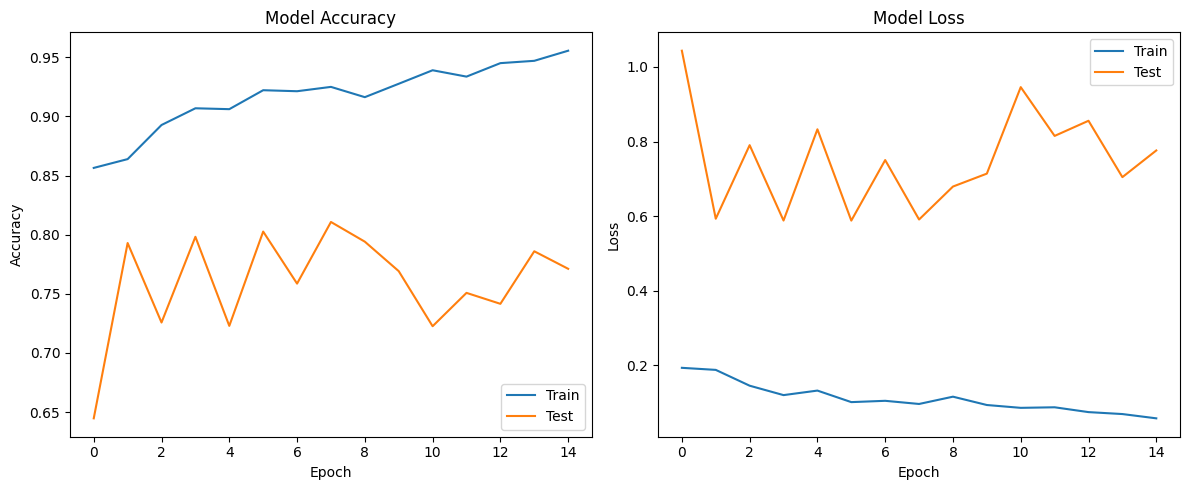

In [ ]:
# Lịch sử accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

# Lịch sử loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
history = model.fit(i_train,validation_data = i_test ,epochs = 15,callbacks = callbacks,class_weight=class_weight)


Epoch 1/15
439/439 [==============================] - 117s 266ms/step - loss: 0.1931 - accuracy: 0.8565 - val_loss: 1.0436 - val_accuracy: 0.6447
Epoch 2/15
439/439 [==============================] - 119s 271ms/step - loss: 0.1875 - accuracy: 0.8639 - val_loss: 0.5930 - val_accuracy: 0.7930
Epoch 3/15
439/439 [==============================] - 117s 266ms/step - loss: 0.1451 - accuracy: 0.8928 - val_loss: 0.7903 - val_accuracy: 0.7258
Epoch 4/15
439/439 [==============================] - 119s 271ms/step - loss: 0.1199 - accuracy: 0.9069 - val_loss: 0.5881 - val_accuracy: 0.7982
Epoch 5/15
439/439 [==============================] - 117s 266ms/step - loss: 0.1320 - accuracy: 0.9061 - val_loss: 0.8328 - val_accuracy: 0.7229
Epoch 6/15
439/439 [==============================] - 120s 273ms/step - loss: 0.1011 - accuracy: 0.9222 - val_loss: 0.5880 - val_accuracy: 0.8026
Epoch 7/15
439/439 [==============================] - 118s 269ms/step - loss: 0.1046 - accuracy: 0.9213 - val_loss: 0.7503 -

In [ ]:
history = model.fit(i_train,validation_data = i_test ,epochs = 5,callbacks = callbacks,class_weight=class_weight)


Epoch 1/5
439/439 [==============================] - 118s 268ms/step - loss: 0.0530 - accuracy: 0.9591 - val_loss: 0.7709 - val_accuracy: 0.7874
Epoch 2/5
439/439 [==============================] - 118s 269ms/step - loss: 0.0502 - accuracy: 0.9631 - val_loss: 0.8564 - val_accuracy: 0.7558
Epoch 3/5
439/439 [==============================] - 118s 268ms/step - loss: 0.0523 - accuracy: 0.9631 - val_loss: 0.9345 - val_accuracy: 0.7562
Epoch 4/5
439/439 [==============================] - 118s 268ms/step - loss: 0.0478 - accuracy: 0.9648 - val_loss: 0.7493 - val_accuracy: 0.7895
Epoch 5/5
439/439 [==============================] - 118s 269ms/step - loss: 0.0673 - accuracy: 0.9539 - val_loss: 0.7897 - val_accuracy: 0.7839


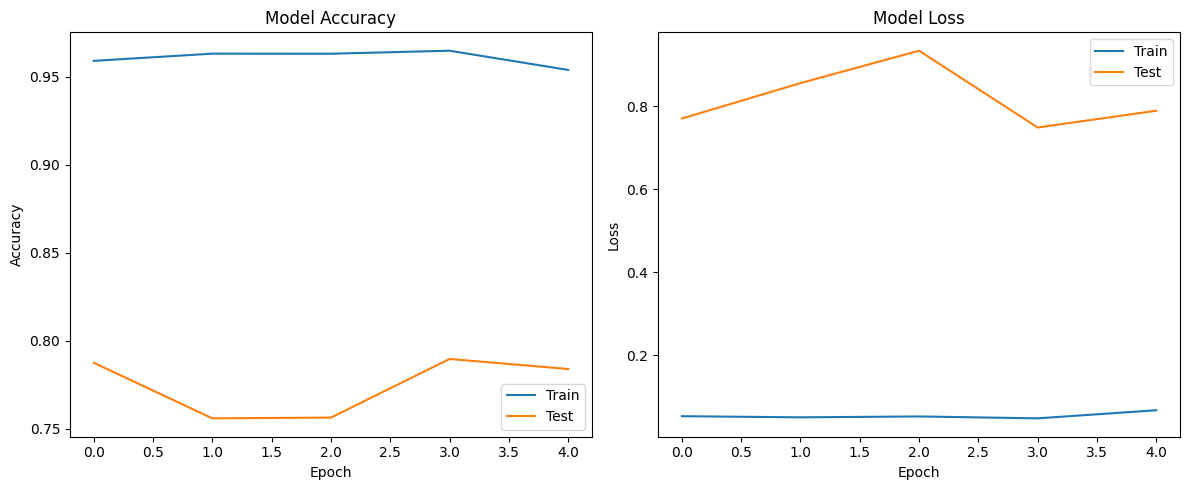

In [ ]:
# Lịch sử accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

# Lịch sử loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print("train:")
model.evaluate(i_train)
print("test:")
model.evaluate(i_test)

Found 7023 images belonging to 5 classes.
train:
439/439 [==============================] - 70s 155ms/step - loss: 0.1154 - accuracy: 0.9594
test:
110/110 [==============================] - 18s 159ms/step - loss: 0.5909 - accuracy: 0.8108


[0.5908669829368591, 0.8107646107673645]

In [ ]:
model.save_weights(os.path.join(SAVE_PATH,'Model_Resnet50_final_end.h5'))

### Test

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
result = model.evaluate(i_test)

Found 7023 images belonging to 5 classes.
110/110 [==============================] - 15s 133ms/step - loss: 0.9560 - accuracy: 0.7970


In [ ]:
model = None
model = build_model_resnet50()
model.load_weights(os.path.join(SAVE_PATH,'Model_Resnet50_final.h5')) #weight with data banlace
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001,
                                                amsgrad=True),
              loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

i_test = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=os.path.join(WORK_PATH,'test'),
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
result = model.evaluate(i_test)

Found 7023 images belonging to 5 classes.
110/110 [==============================] - 16s 133ms/step - loss: 0.7993 - accuracy: 0.8062
